In [1]:
import dill
import numpy as np
from skimage.measure import regionprops_table

from runners import (
    CellposeRunner,
    ElephantRunner,
    StarDistRunner,
)
from utils import (
    get_data,
    plot_img_label,
    plot_stats,
    seg_cmap,
    to_sparse,
)

2023-05-05 15:44:13.666122: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-05 15:44:13.692539: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data

<div class="alert alert-block alert-info">
Training data (for input `X` with associated label masks `Y`) can be provided via lists of numpy arrays, where each image can have a different size. Alternatively, a single numpy array can also be used if all images have the same size.  
Input images can either be two-dimensional (single-channel) or three-dimensional (multi-channel) arrays, where the channel axis comes last. Label images need to be integer-valued.
</div>

Training data consists of pairs of input image and label instances.

In [2]:
(x_trn, y_trn), (x_val, y_val) = get_data()

Files found, nothing to download.


100%|██████████| 50/50 [00:00<00:00, 357.69it/s]

number of images for training:   447
number of images for validation:  50


## Plot all labels

In [16]:
ind = 6

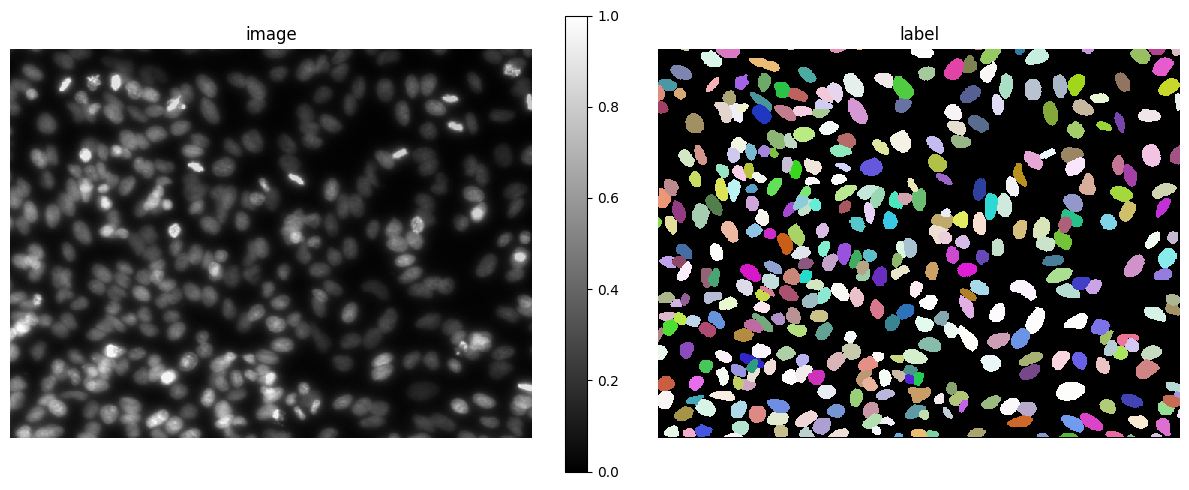

In [17]:
plot_img_label(x_trn[ind], y_trn[ind])

## make sparse annotation

Find the darkest and brightest nuclei

1it [00:00, 22.92it/s]


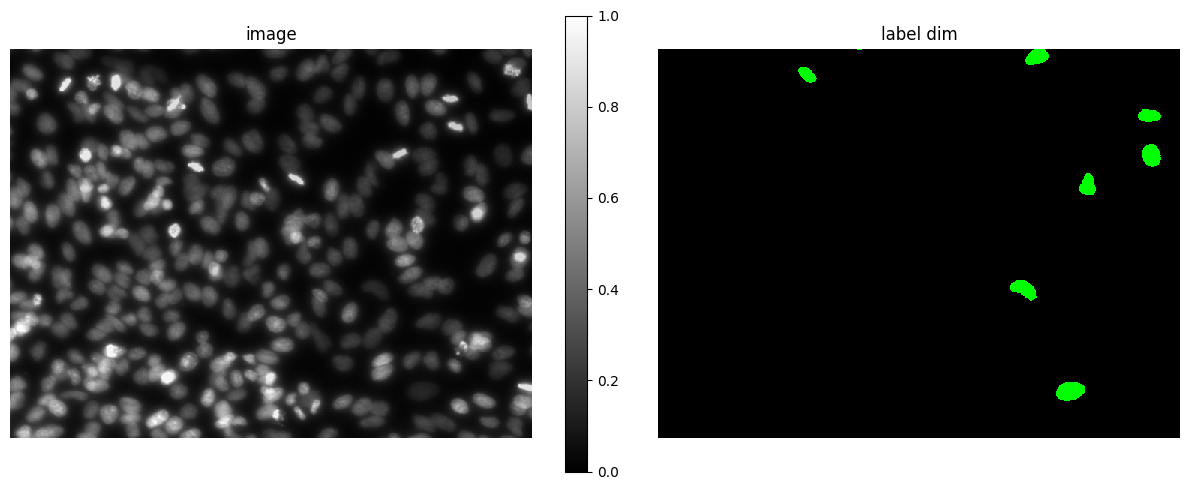

1it [00:00, 26.70it/s]


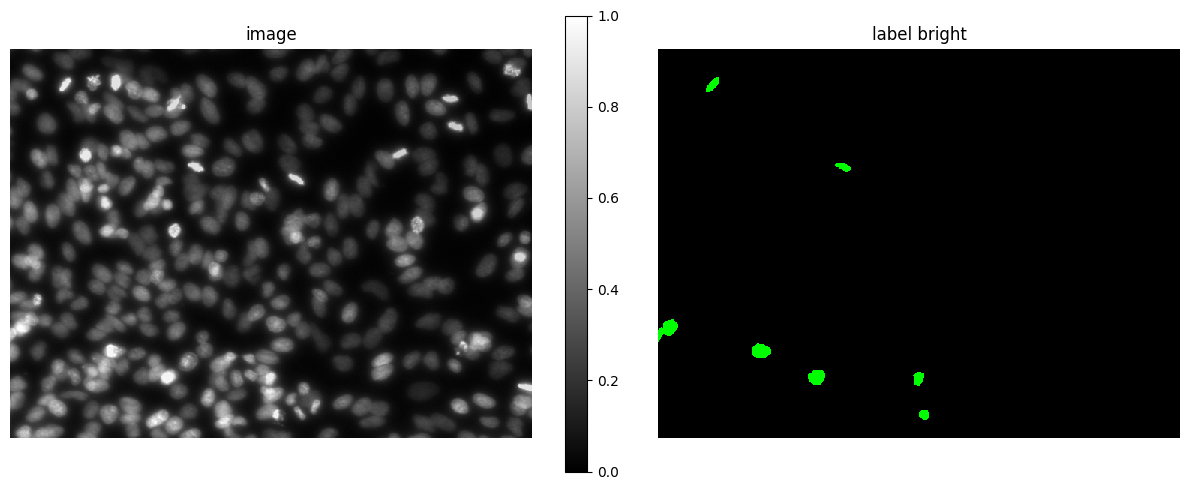

1it [00:00, 23.55it/s]


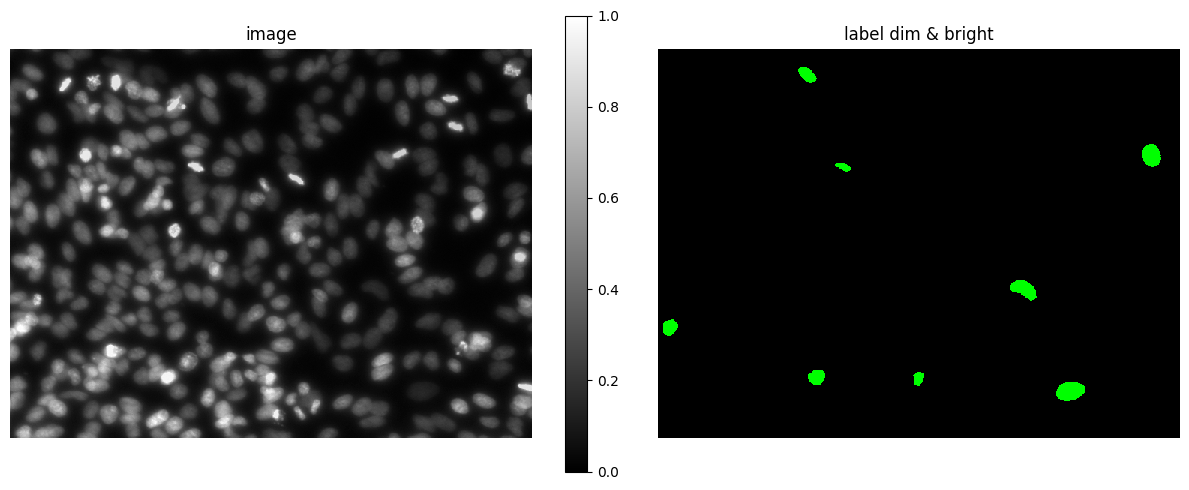

In [31]:
kth = 4
plot_img_label(x_trn[ind], to_sparse([x_trn[ind]], [y_trn[ind]], kth, include_bg=False, mode='min')[0].clip(None, 1),
               lbl_title='label dim', lbl_cmap=seg_cmap)
plot_img_label(x_trn[ind], to_sparse([x_trn[ind]], [y_trn[ind]], kth, include_bg=False, mode='max')[0].clip(None, 1),
               lbl_title='label bright', lbl_cmap=seg_cmap)
plot_img_label(x_trn[ind], to_sparse([x_trn[ind]], [y_trn[ind]], kth, include_bg=False, mode='minmax')[0].clip(None, 1),
               lbl_title='label dim & bright', lbl_cmap=seg_cmap)

1it [00:00, 25.00it/s]
1it [00:00, 720.42it/s]


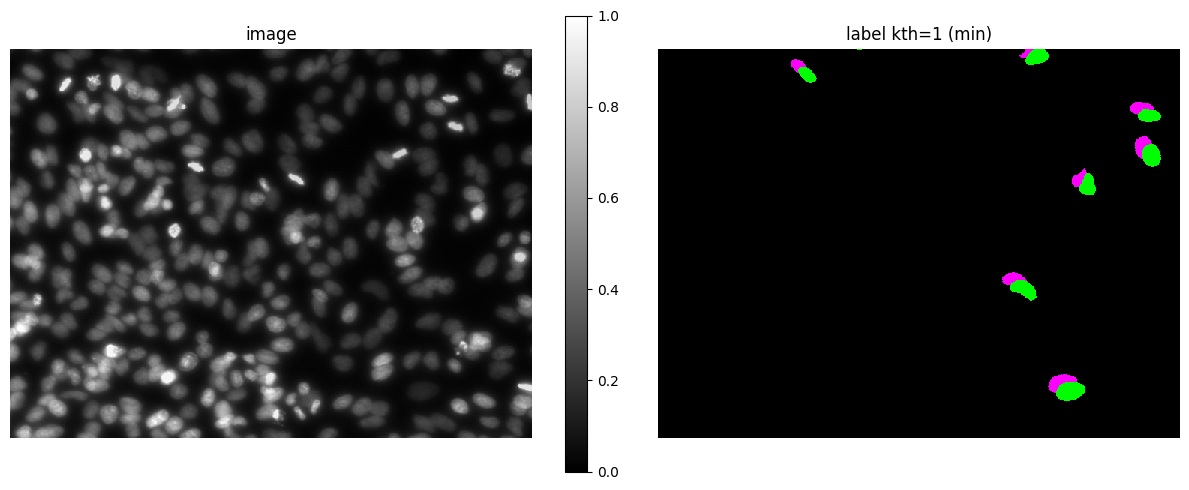

1it [00:00, 24.59it/s]
1it [00:00, 830.72it/s]


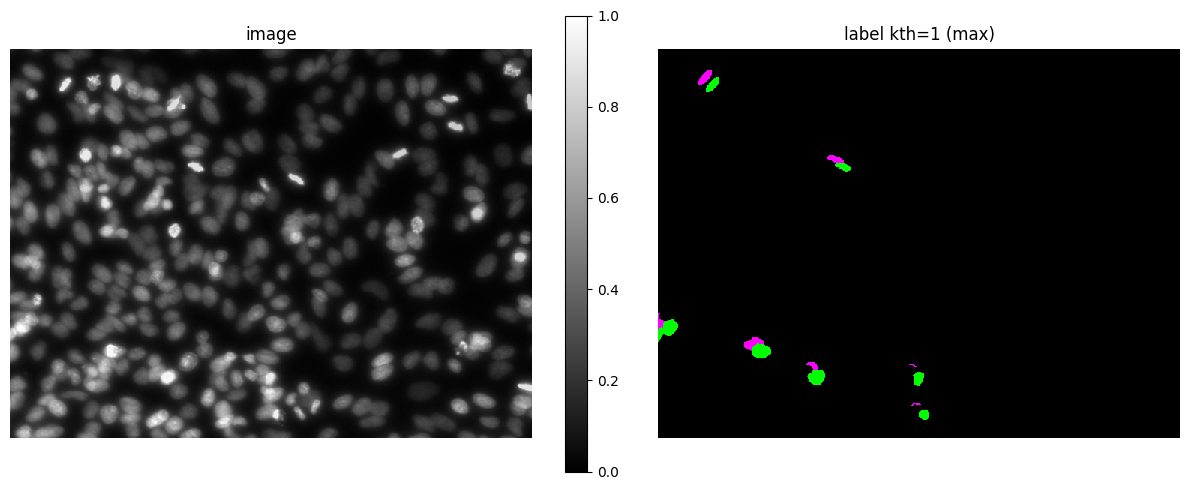

1it [00:00, 22.74it/s]
1it [00:00, 685.01it/s]


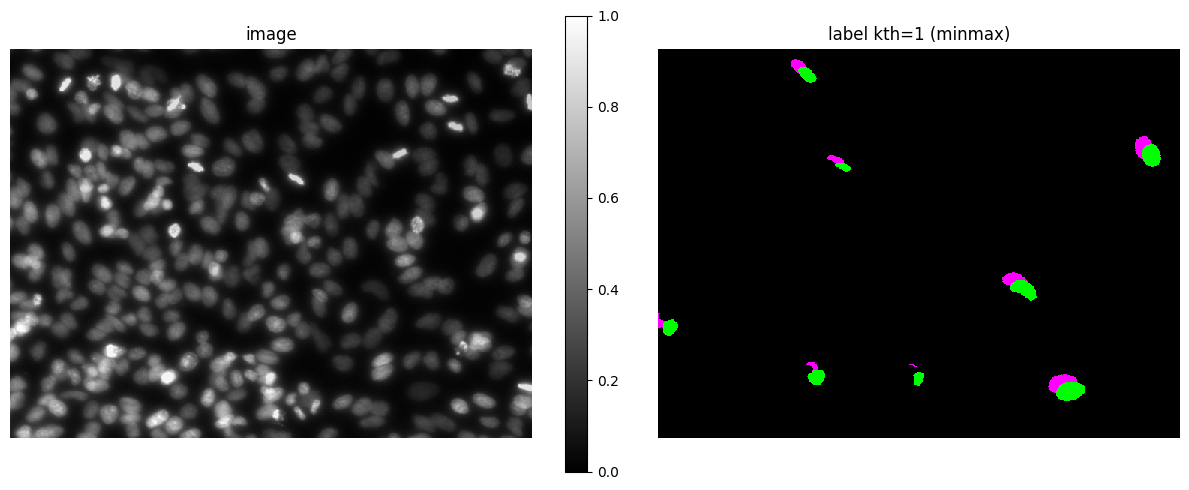

In [6]:
plot_img_label(x_trn[ind], to_sparse([x_trn[ind]], [y_trn[ind]], kth, include_bg=True, mode='min')[0].clip(None, 1),
               lbl_title='label kth=1 (min)', lbl_cmap=seg_cmap)
plot_img_label(x_trn[ind], to_sparse([x_trn[ind]], [y_trn[ind]], kth, include_bg=True, mode='max')[0].clip(None, 1),
               lbl_title='label kth=1 (max)', lbl_cmap=seg_cmap)
plot_img_label(x_trn[ind], to_sparse([x_trn[ind]], [y_trn[ind]], kth, include_bg=True, mode='minmax')[0].clip(None, 1),
               lbl_title='label kth=1 (minmax)', lbl_cmap=seg_cmap)

In [13]:
is_train = input('Train models? (existing models can be overwritten) (y/n): ').lower().strip() == 'y'

Train models? (existing models can be overwritten) (y/n): y


In [14]:
cellpose_runner = CellposeRunner(
    save_path='models/cellpose/paper04',
    n_epochs=100,
)

2023-05-05 10:53:31,837 [INFO] WRITING LOG OUTPUT TO /root/.cellpose/run.log


In [15]:
elephant_runner = ElephantRunner(
    is_3d=False,
    model_dir="models/elephant/paper04",
    log_dir="models/elephant/logs/paper04",
    n_epochs=100,
    rotation_angle=0,
)

In [16]:
train_batch_size = 8
stardist_runner = StarDistRunner(
    grid=(2, 2),
    basedir='models/stardist/paper04',
    use_gpu=False,
    train_epochs=100,
    train_patch_size=(224, 224),
    train_batch_size=train_batch_size,
    train_steps_per_epoch=len(x_trn) // train_batch_size + 1,
)

447it [00:02, 200.98it/s]

2023-05-05 10:53:40,790 [INFO] ** TORCH CUDA version installed and working. **


2023-05-05 10:53:40,791 [INFO] >>>> using GPU
2023-05-05 10:53:41,281 [INFO] computing flows for labels


100%|█████████████████████████████████████████████████████████████████████| 447/447 [00:05<00:00, 81.42it/s]


2023-05-05 10:53:47,764 [INFO] computing flows for labels


100%|███████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.87it/s]


2023-05-05 10:53:49,327 [INFO] >>>> median diameter set to = 30
2023-05-05 10:53:49,327 [INFO] >>>> mean of training label mask diameters (saved to model) 14.822
2023-05-05 10:53:49,328 [INFO] >>>> training network with 2 channel input <<<<
2023-05-05 10:53:49,329 [INFO] >>>> LR: 0.00100, batch_size: 8, weight_decay: 0.00010
2023-05-05 10:53:49,329 [INFO] >>>> ntrain = 447, ntest = 50
2023-05-05 10:53:49,331 [INFO] >>>> nimg_per_epoch = 447
2023-05-05 10:53:57,832 [INFO] Epoch 0, Time  8.5s, Loss 2.0830, Loss Test 1.5598, LR 0.0000
2023-05-05 10:54:05,694 [INFO] saving network parameters to models/cellpose/paper04/models/min_001
2023-05-05 10:54:37,596 [INFO] Epoch 5, Time 48.3s, Loss 1.0680, Loss Test 1.3154, LR 0.0006
2023-05-05 10:55:17,883 [INFO] Epoch 10, Time 88.6s, Loss 0.8103, Loss Test 1.5505, LR 0.0010
2023-05-05 10:56:38,176 [INFO] Epoch 20, Time 168.8s, Loss 0.5580, Loss Test 1.4350, LR 0.0010
2023-05-05 10:57:58,675 [INFO] Epoch 30, Time 249.3s, Loss 0.5008, Loss Test 1.84

100%|███████████████████████████████████████████████████████████████████████| 50/50 [00:15<00:00,  3.22it/s]


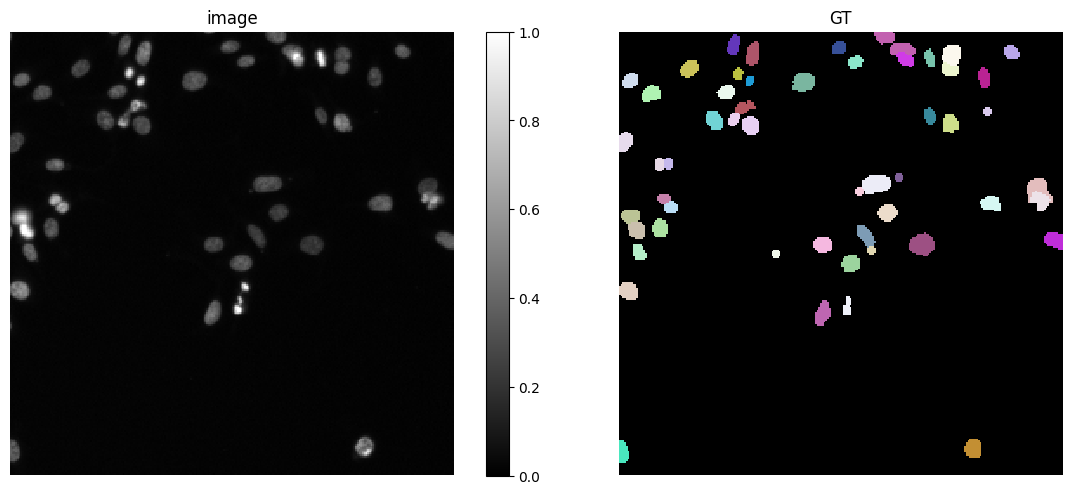

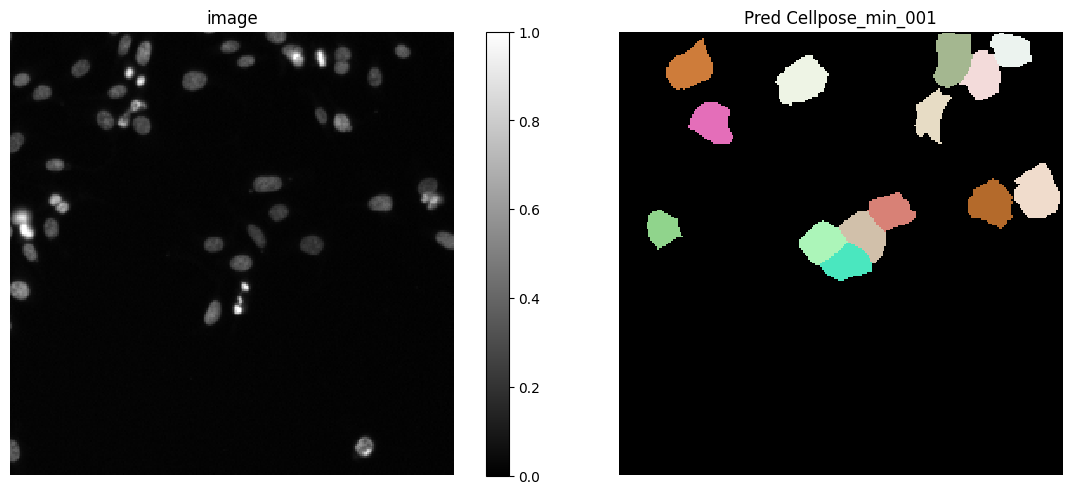

447it [00:02, 211.46it/s]

2023-05-05 11:07:33,041 [INFO] ** TORCH CUDA version installed and working. **
2023-05-05 11:07:33,042 [INFO] >>>> using GPU


2023-05-05 11:07:33,212 [INFO] computing flows for labels


100%|█████████████████████████████████████████████████████████████████████| 447/447 [00:06<00:00, 71.63it/s]


2023-05-05 11:07:40,352 [INFO] computing flows for labels


100%|███████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.63it/s]


2023-05-05 11:07:41,937 [INFO] >>>> median diameter set to = 30
2023-05-05 11:07:41,938 [INFO] >>>> mean of training label mask diameters (saved to model) 19.822
2023-05-05 11:07:41,939 [INFO] >>>> training network with 2 channel input <<<<
2023-05-05 11:07:41,939 [INFO] >>>> LR: 0.00100, batch_size: 8, weight_decay: 0.00010
2023-05-05 11:07:41,940 [INFO] >>>> ntrain = 447, ntest = 50
2023-05-05 11:07:41,940 [INFO] >>>> nimg_per_epoch = 447
2023-05-05 11:07:50,410 [INFO] Epoch 0, Time  8.5s, Loss 3.6792, Loss Test 1.5429, LR 0.0000
2023-05-05 11:07:58,467 [INFO] saving network parameters to models/cellpose/paper04/models/min_004
2023-05-05 11:08:31,071 [INFO] Epoch 5, Time 49.1s, Loss 1.3506, Loss Test 1.0097, LR 0.0006
2023-05-05 11:09:11,940 [INFO] Epoch 10, Time 90.0s, Loss 0.7995, Loss Test 1.2463, LR 0.0010
2023-05-05 11:10:33,256 [INFO] Epoch 20, Time 171.3s, Loss 0.5651, Loss Test 1.4959, LR 0.0010
2023-05-05 11:11:54,604 [INFO] Epoch 30, Time 252.7s, Loss 0.5116, Loss Test 1.68

KeyboardInterrupt: 

In [17]:
stats_list_dict = {}
for runner in (cellpose_runner, elephant_runner, stardist_runner):
    for include_bg in (False, True):
        for mode in ('min', 'max', 'minmax'):
            key = f'{runner.name()}_{mode}{"_bg" if include_bg else ""}'
            stats_list_dict[key] = runner.run(
                x_trn,
                y_trn,
                x_val,
                y_val,
                mode=mode,
                is_train=is_train,
                include_bg=include_bg,
            )

# Optional: save and load stats list

## Save stats list

In [29]:
with open("stats_list.pkl", "wb") as fp:
    dill.dump(stats_list_dict, fp)

## Load stats list

In [11]:
with open("stats_list.pkl", "rb") as fp:
    stats_list_dict = dill.load(fp)

# Plot stats

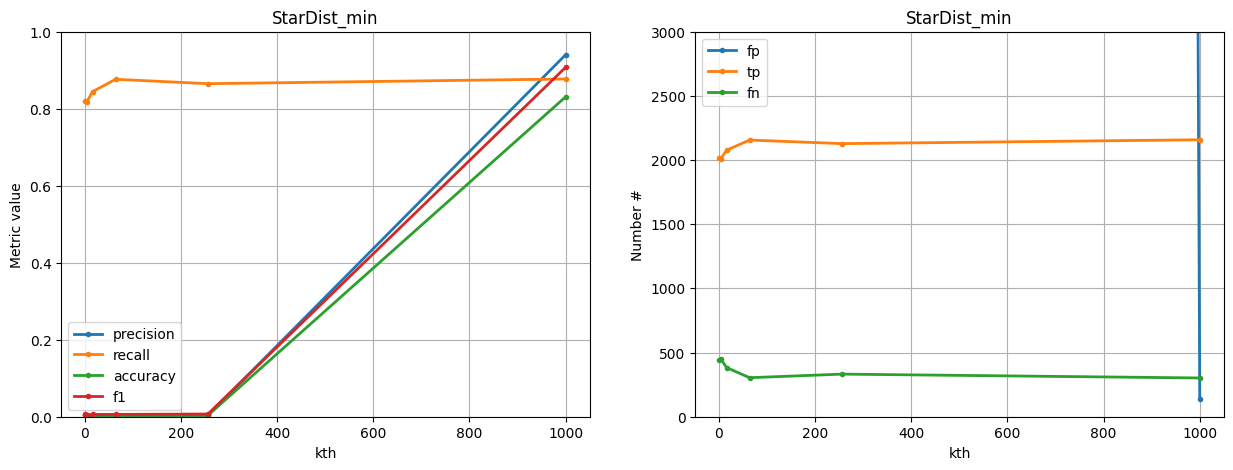

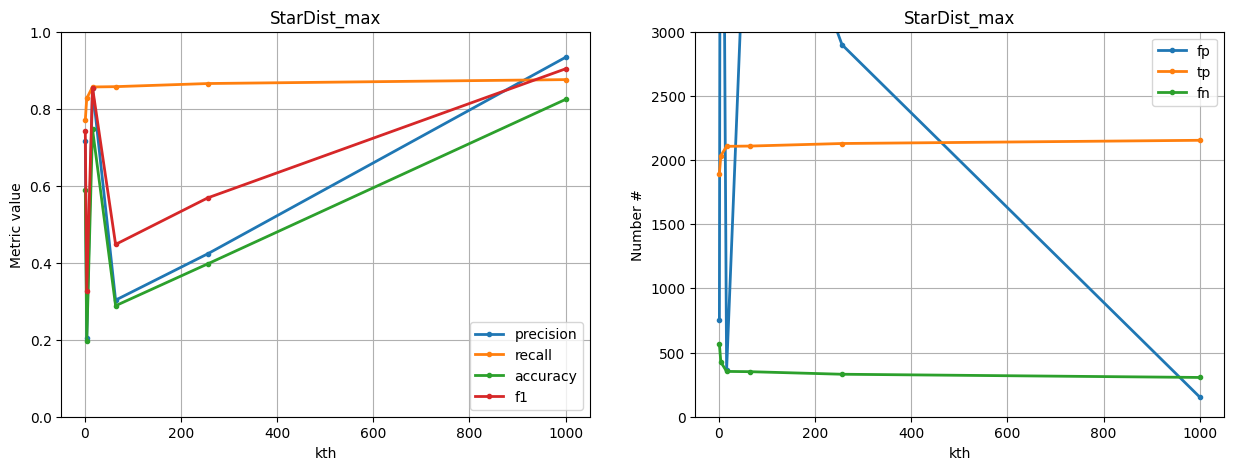

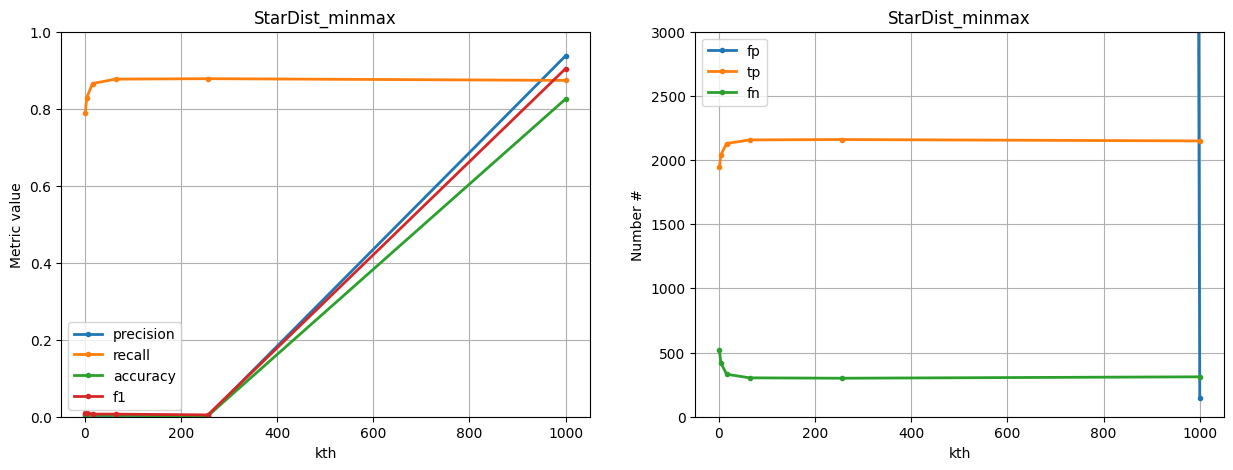

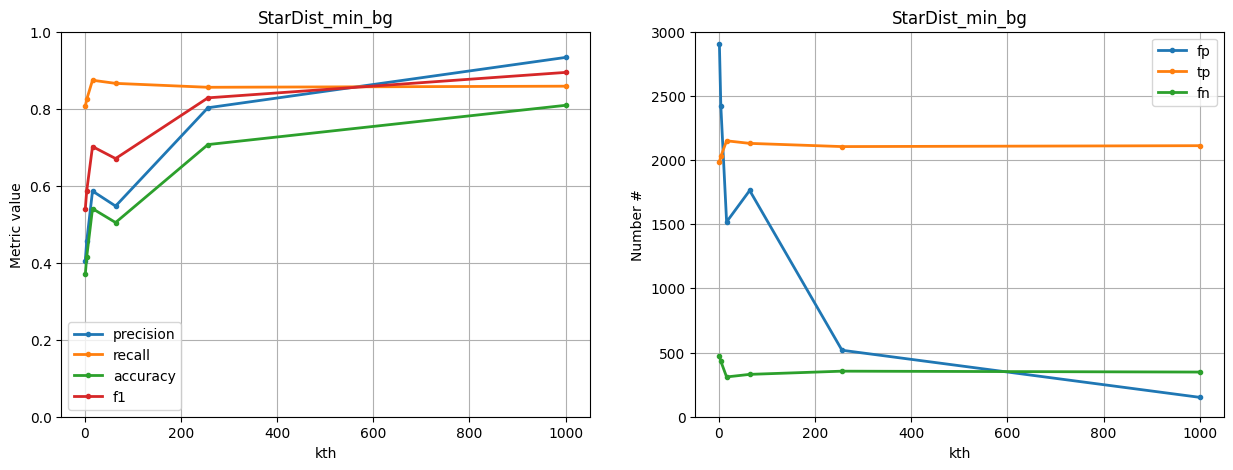

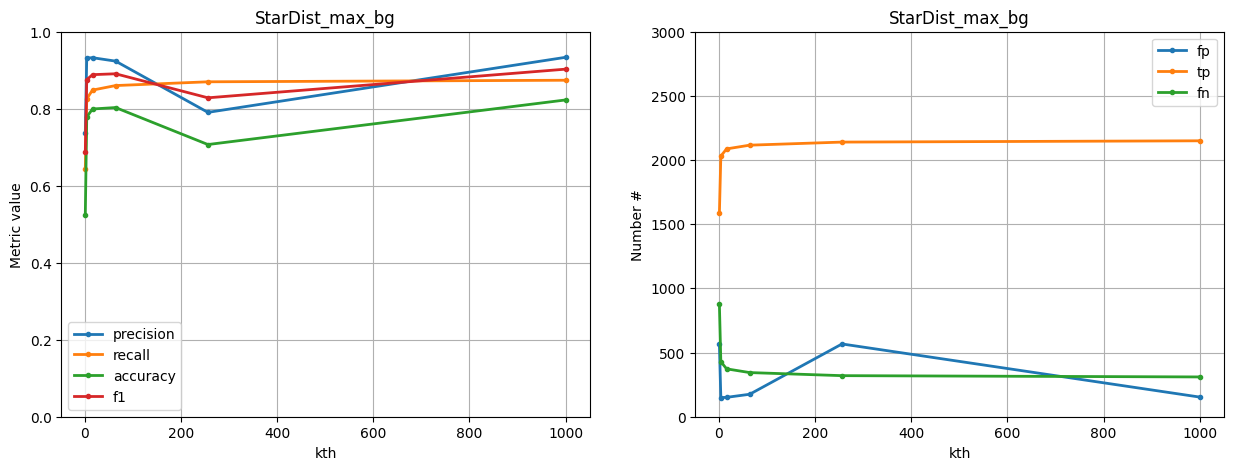

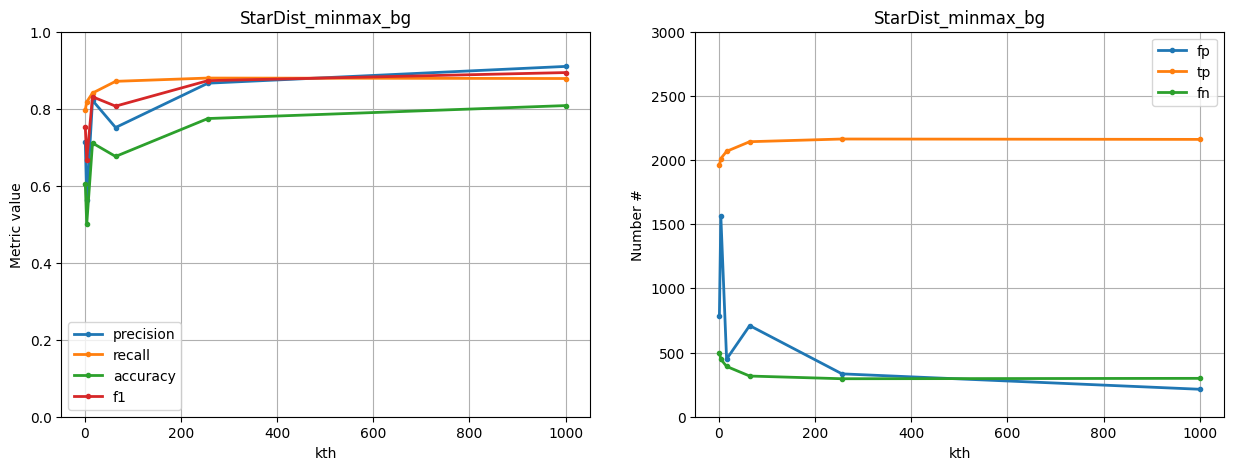

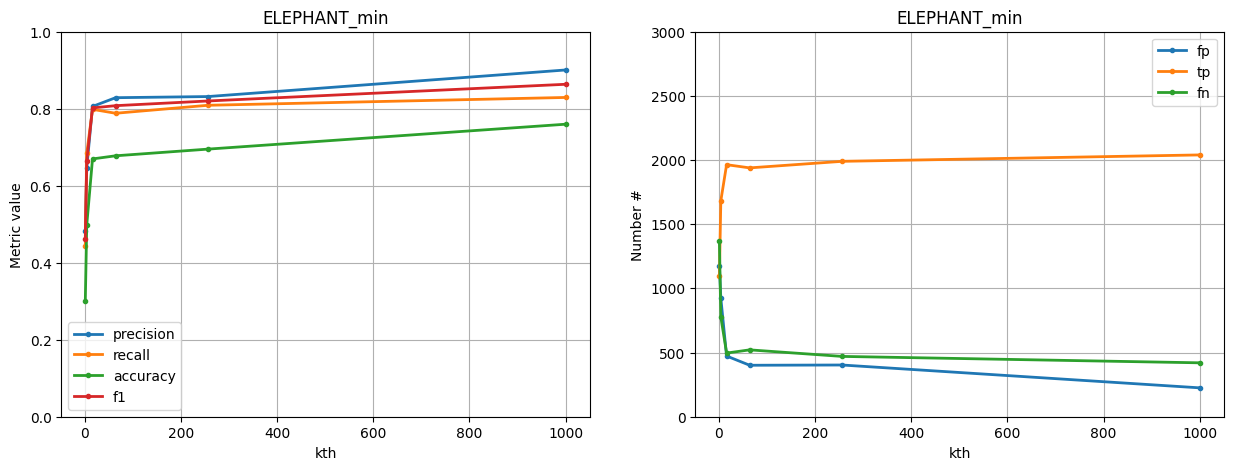

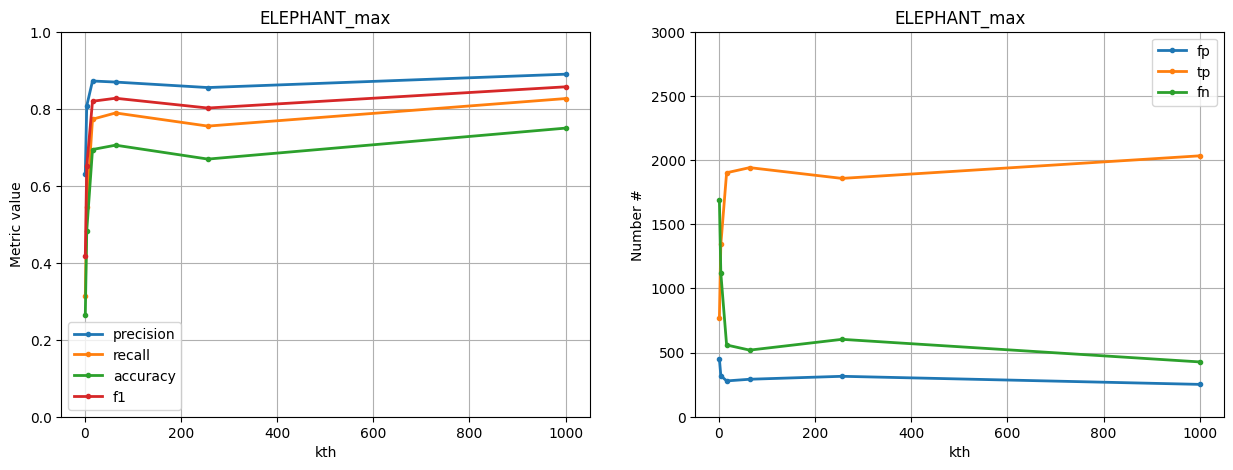

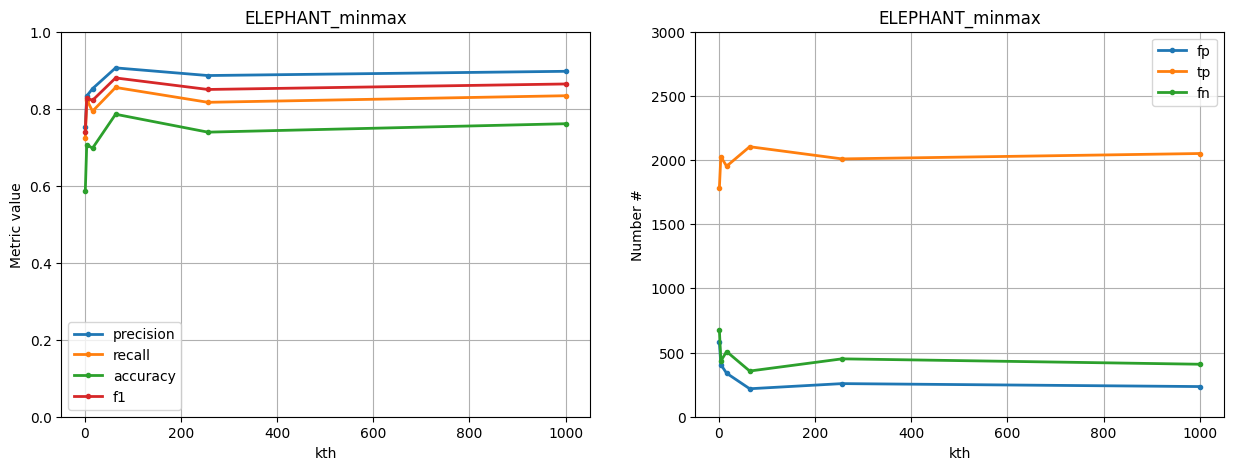

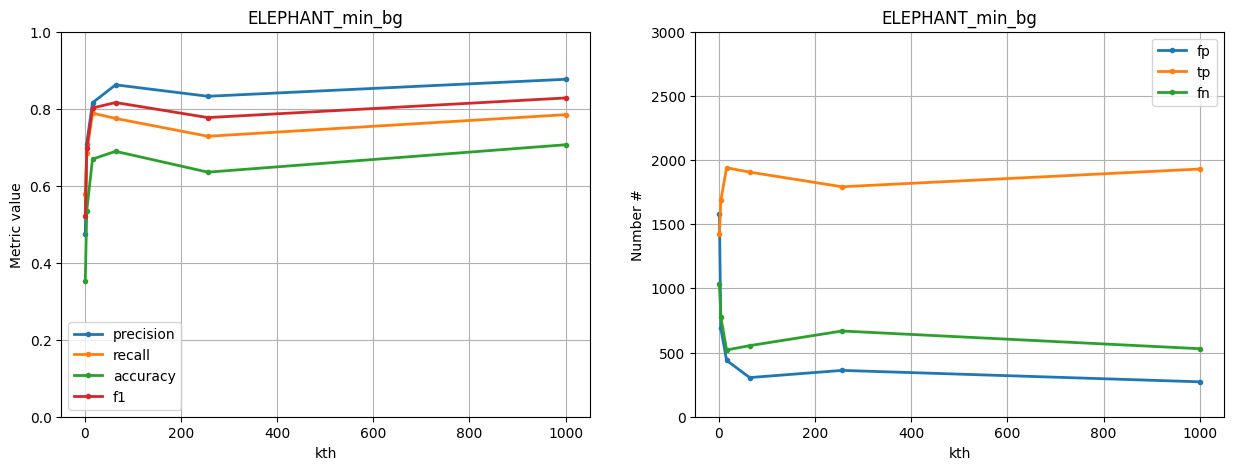

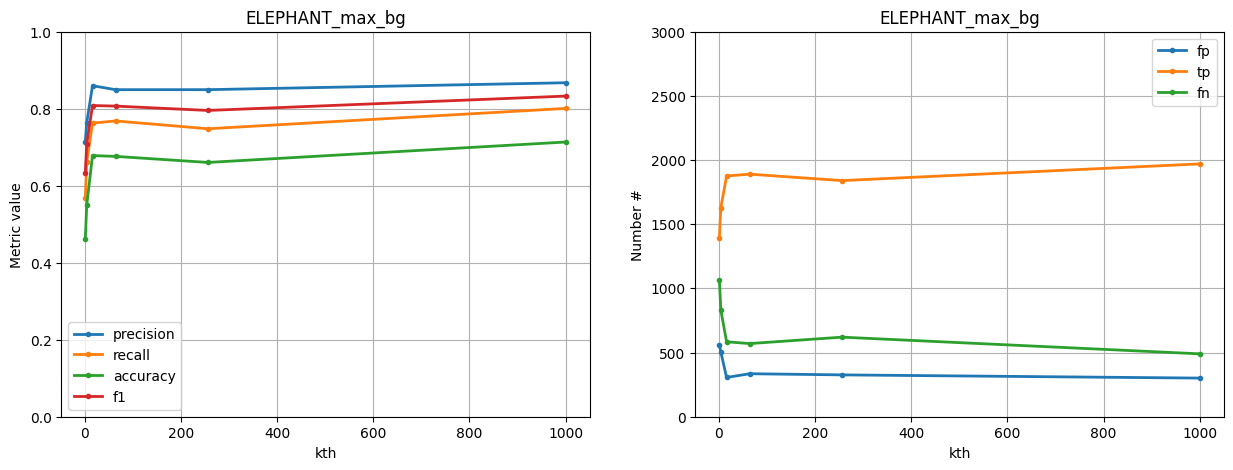

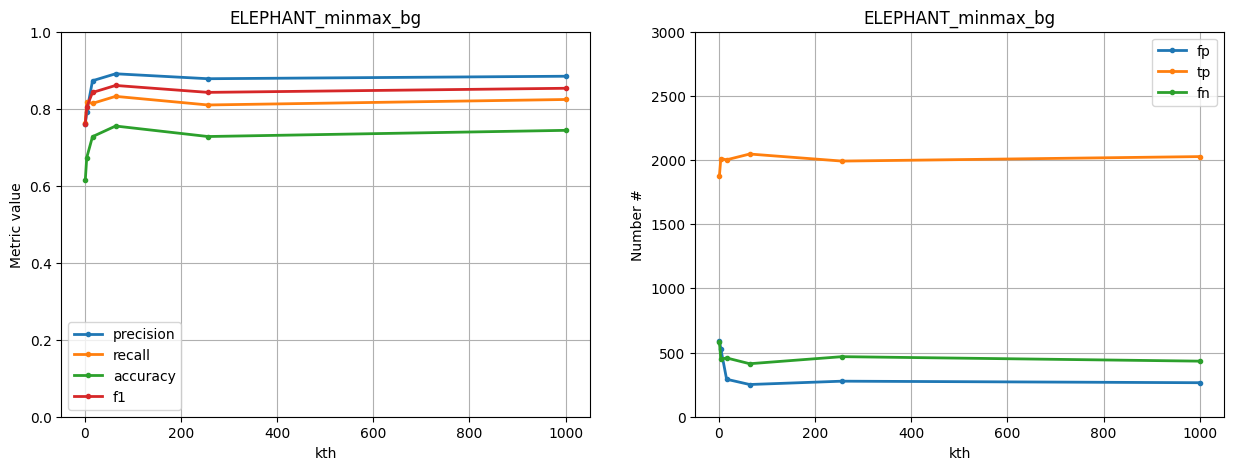

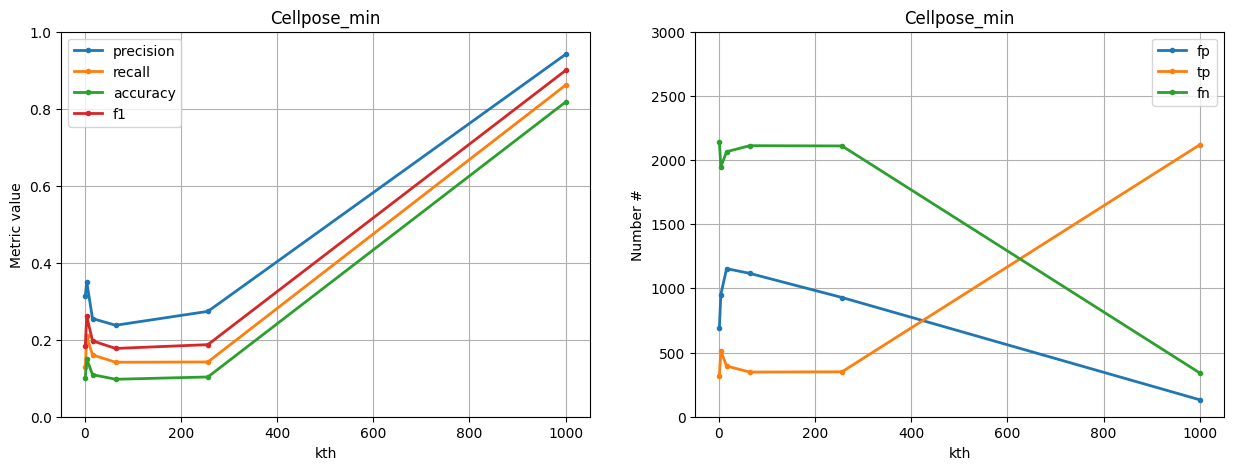

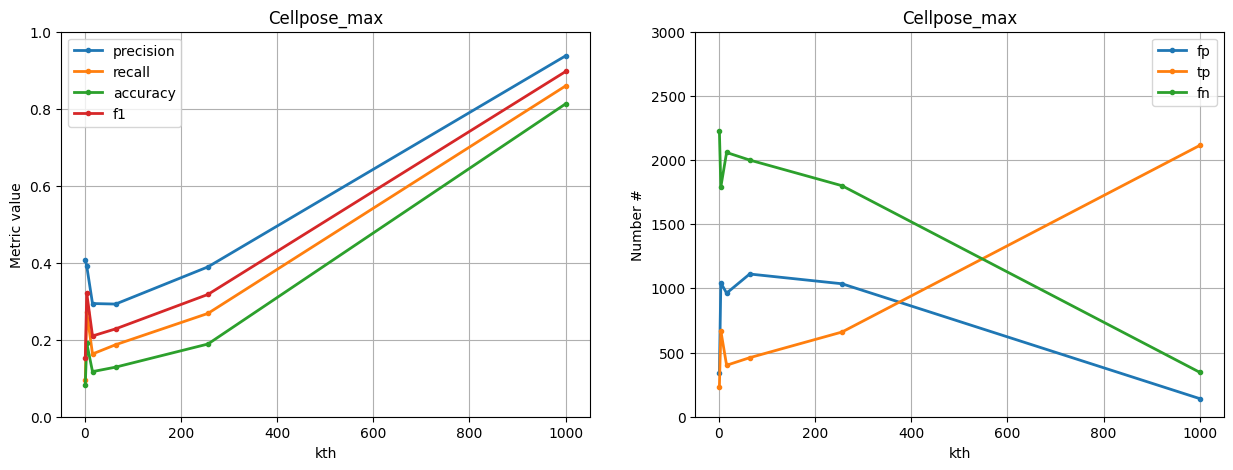

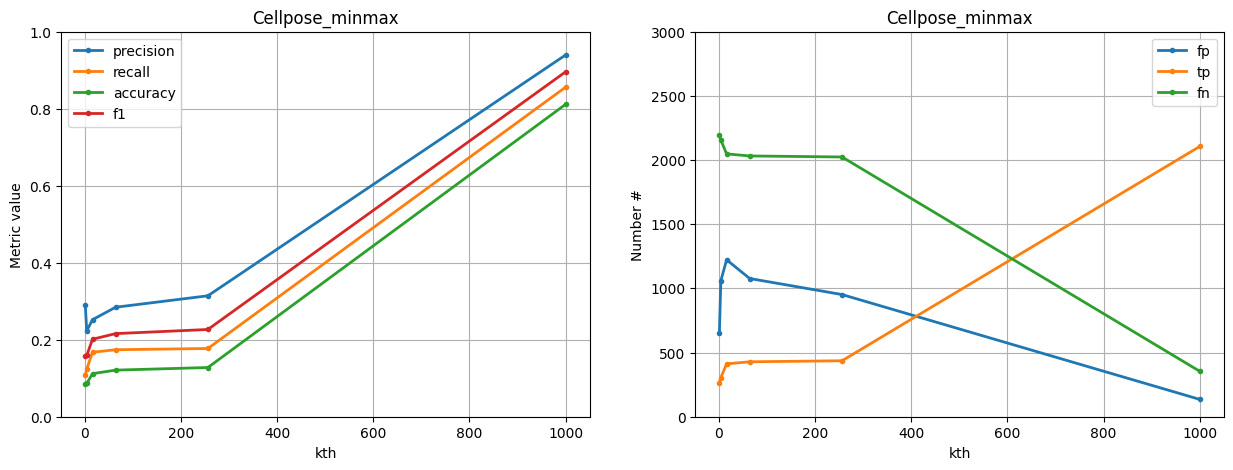

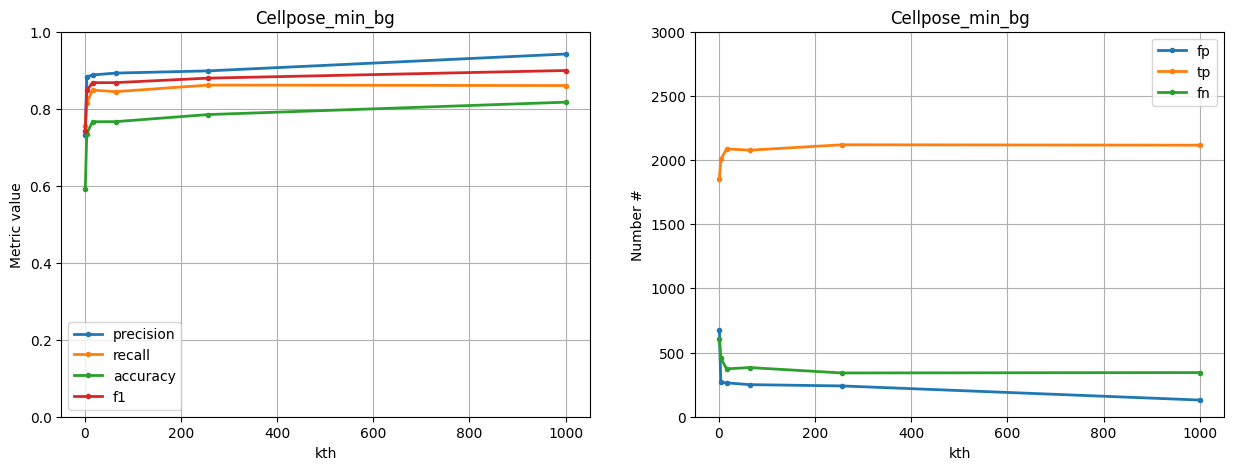

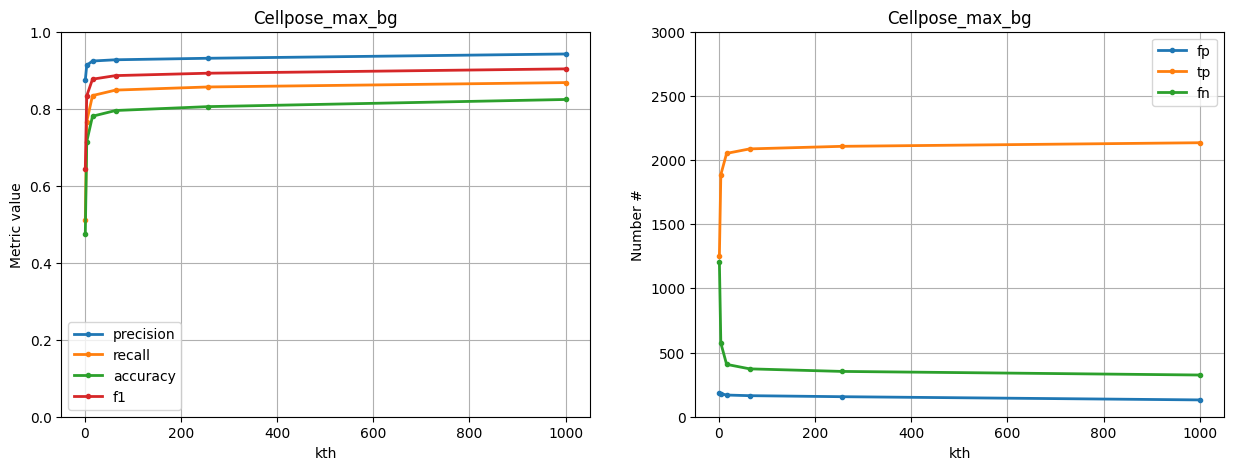

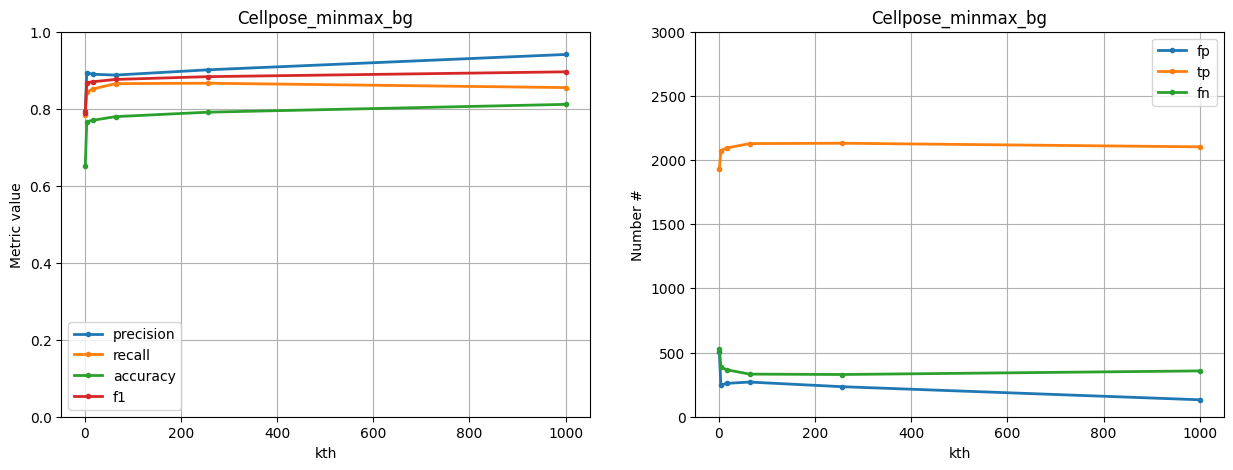

In [12]:
for algorithm in ("StarDist", "ELEPHANT", "Cellpose"):
    for include_bg in (False, True):
        for mode in ('min', 'max', 'minmax'):
            key = f'{algorithm}_{mode}{"_bg" if include_bg else ""}'
            plot_stats(stats_list_dict[key], key, metrics=("precision", "recall", "accuracy", "f1"))

In [10]:
def get_plot_data(kth):
    data = []
    for i, (img, lbl) in enumerate(zip(x_trn, y_trn)):
        props = regionprops_table(lbl, img, properties=("mean_intensity", "minor_axis_length"))
        keep = np.nonzero(props["minor_axis_length"])
        intensities = props["mean_intensity"][keep]
        intensities = np.sort(intensities)
        colors_min = np.zeros(intensities.shape, dtype=np.uint8)
        colors_max = np.zeros(intensities.shape, dtype=np.uint8)
        colors_minmax = np.zeros(intensities.shape, dtype=np.uint8)
        colors_min[:kth*2] = 1
        colors_max[-kth*2:] = 1
        colors_minmax[:kth*2] = 1
        colors_minmax[-kth*2:] = 1
        for intensity, c_min, c_max, c_minmax in zip(intensities, colors_min, colors_max, colors_minmax):
            data.append([i, intensity, c_min, c_max, c_minmax])
    data = np.array(data)
    return data

In [11]:
data_list = [get_plot_data(kth) for kth in (1, 4, 16, 64, 256)]

In [12]:
import matplotlib.pyplot as plt

In [13]:
def map_color(c):
    if c == 1:
        return "magenta"
    return "gray"

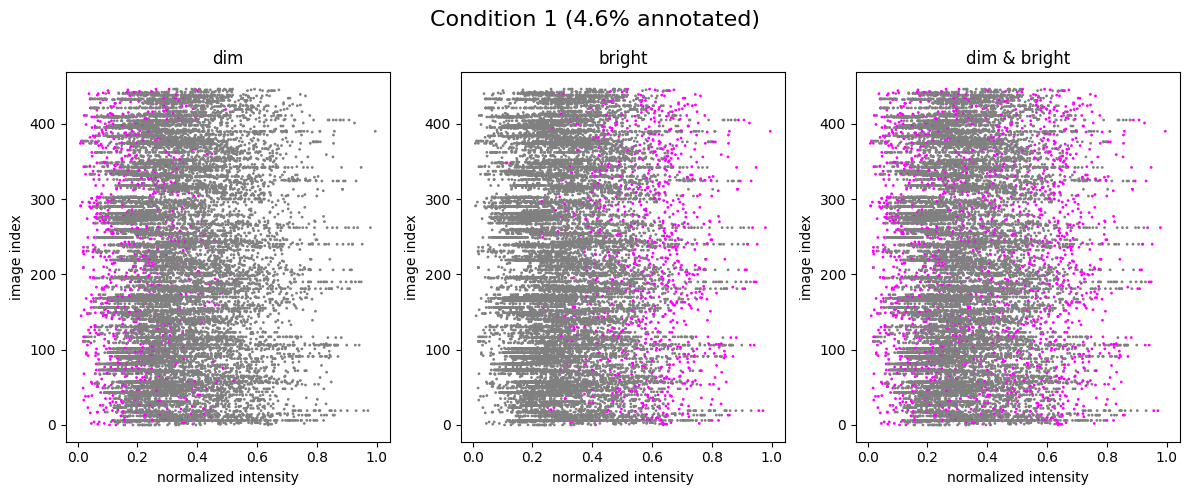

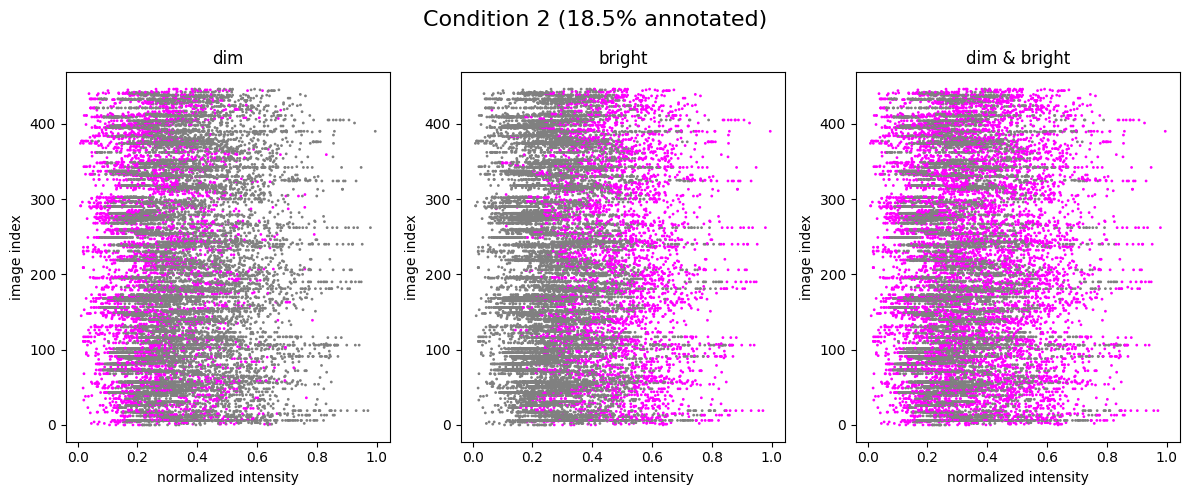

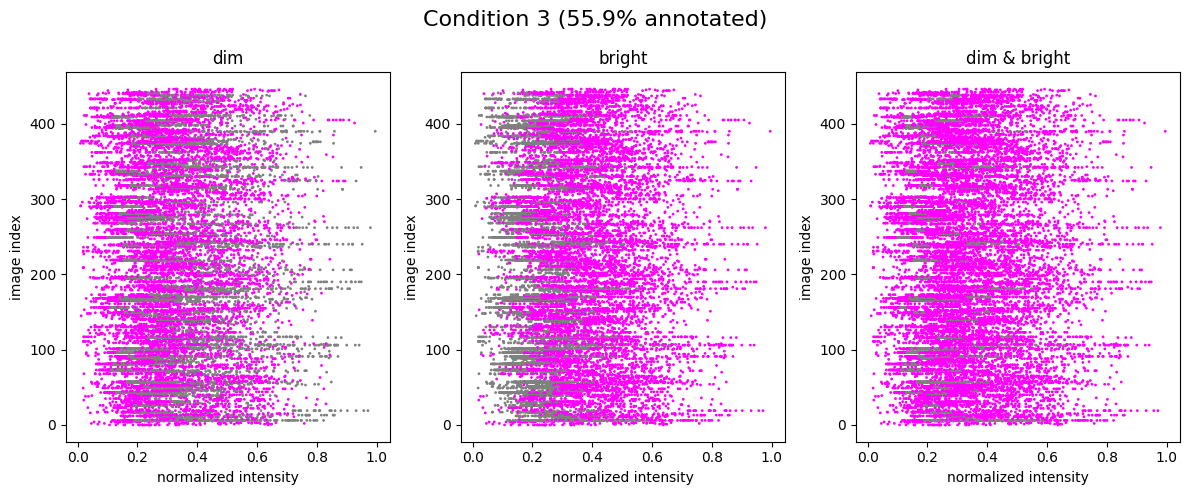

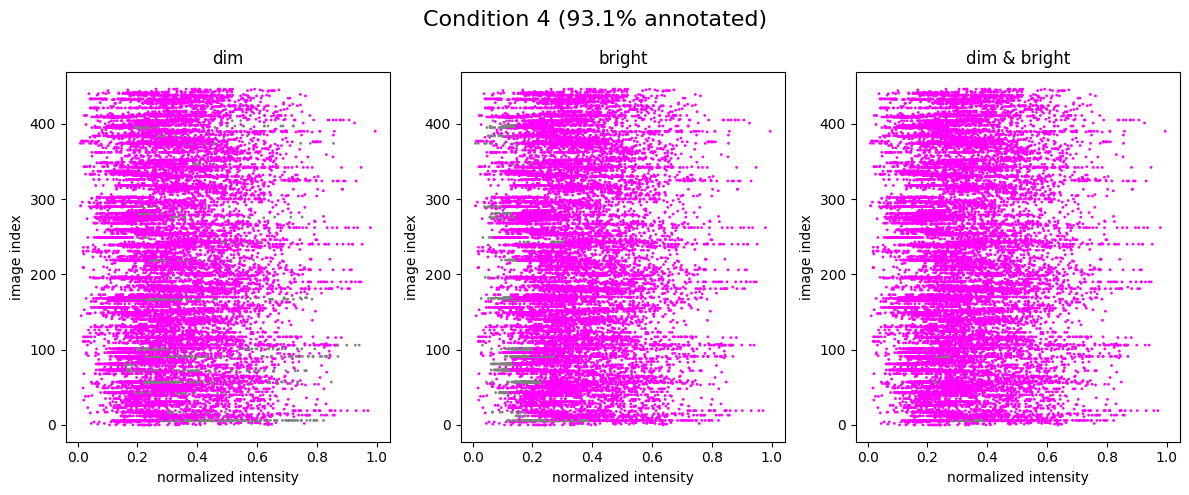

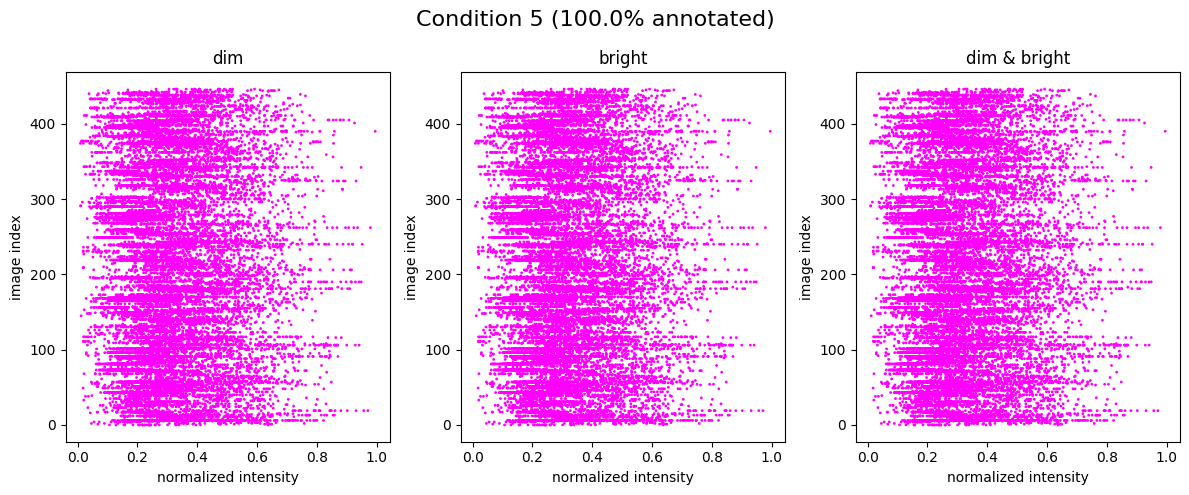

In [14]:
for ind, data in enumerate(data_list):
    fig, axs = plt.subplots(
        1, 3, figsize=(12, 5),
    )
    percentage = data[:, 2].sum() / len(data[:, 2]) * 100
    strategies = ("dim", "bright", "dim & bright")
    fig.suptitle(f"Condition {ind + 1} ({percentage:.1f}% annotated)", fontsize=16)
    for i in range(3):
        axs[i].scatter(data[:, 1], data[:, 0], c=list(map(map_color, data[:, 2+i])), s=1)
        axs[i].set_title(strategies[i])
        axs[i].set_xlabel("normalized intensity")
        axs[i].set_ylabel("image index")
    plt.tight_layout()
    plt.show()
    plt.close(fig)